In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv') 


In [2]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() #setting seaborn as default for plots

In [11]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived','Death']
    df.plot(kind= 'bar', stacked= True, figsize=(10,5))

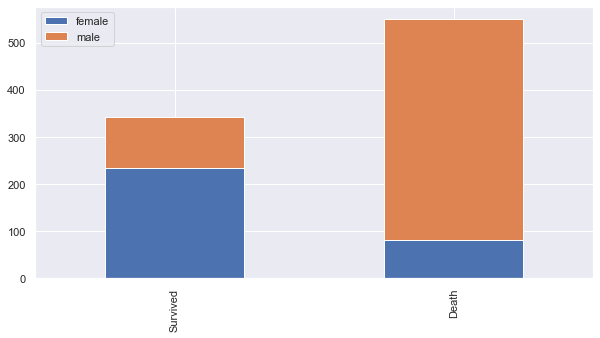

In [12]:
bar_chart('Sex')

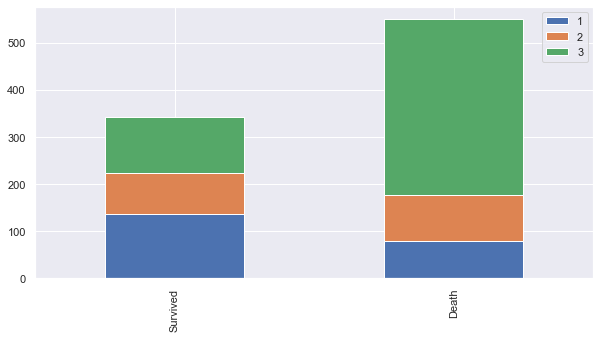

In [13]:
bar_chart('Pclass')

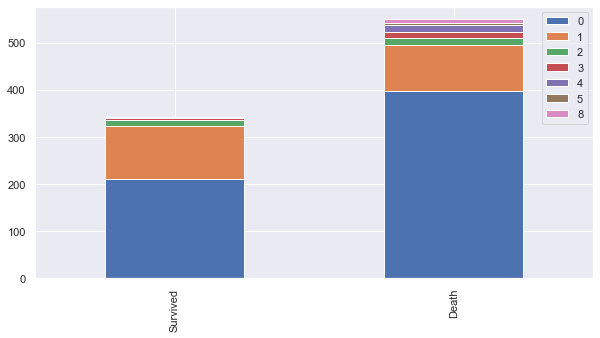

In [14]:
bar_chart('SibSp')

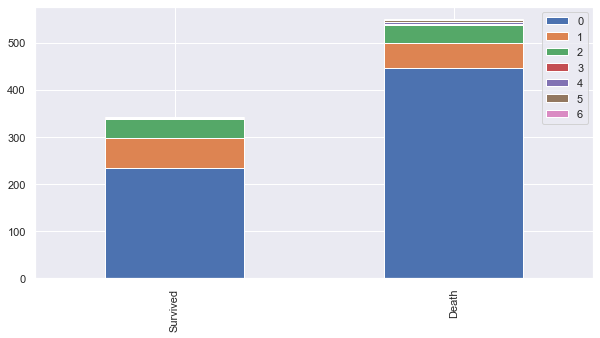

In [15]:
bar_chart('Parch')

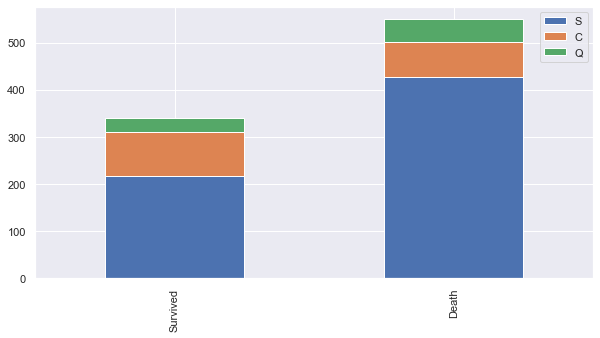

In [16]:
bar_chart('Embarked')

# **Feature Engineering *

In [17]:
train.head(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [18]:
train_test_data = [train, test]

for dataset in train_test_data:
    dataset['Title']= dataset['Name'].str.extract(' ([A-Za-z]+)\.',expand= False)
    

In [19]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Don           1
Ms            1
Countess      1
Jonkheer      1
Sir           1
Mme           1
Lady          1
Capt          1
Name: Title, dtype: int64

In [20]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

# Title Mapping
Mr : 0 
<br>
Miss : 1
<br>
Mrs : 2
<br>
others: 3

In [21]:
title_mapping = {'Mr': 0,'Miss': 1,'Mrs': 2, 
                 'Master': 3,'Dr': 3,'Rev': 3,'Mlle': 3,'Col':3,'Major':3,'Lady':3,'Jonkheer': 3,'Ms': 3,
                 'Countess': 3,'Capt': 3,'Sir': 3,'Mme': 3,'Don':3, 'Dona':3 }
for dataset in train_test_data:
    dataset["Title"] = dataset["Title"].map(title_mapping)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [23]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


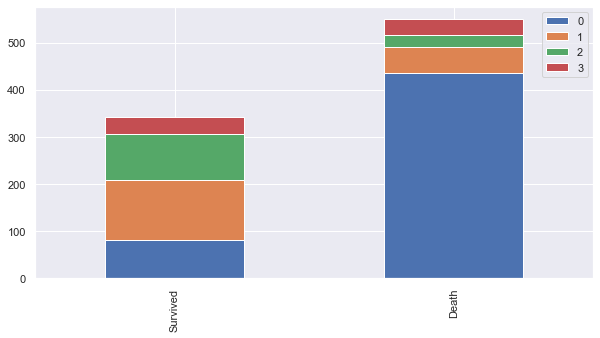

In [24]:
bar_chart('Title')

In [25]:
train.drop('Name', axis= 1, inplace= True)
test.drop('Name', axis= 1, inplace= True)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [27]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


In [28]:
sex_mapping = {"male":0, "female":1}
for dataset in train_test_data:
    dataset["Sex"] = dataset["Sex"].map(sex_mapping)

In [29]:
train.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


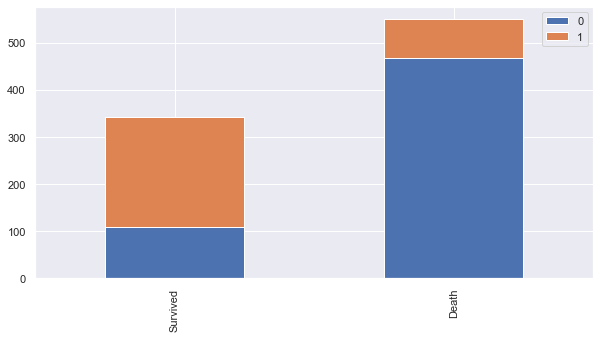

In [30]:
bar_chart("Sex")

In [31]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [32]:
train['Age'].fillna(train.groupby("Title")["Age"].transform("median"),inplace=True)
test['Age'].fillna(test.groupby("Title")["Age"].transform("median"),inplace=True)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


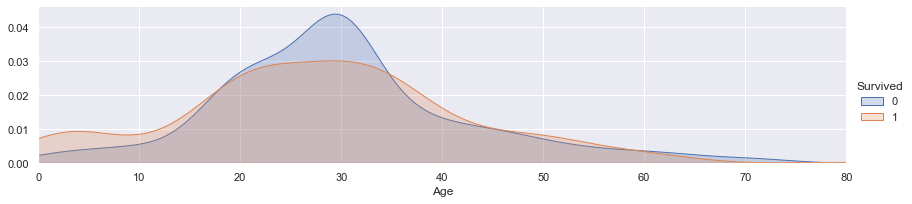

In [34]:
facet= sns.FacetGrid(train, hue= "Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train["Age"].max()))
facet.add_legend()

plt.show()


(0.0, 20.0)

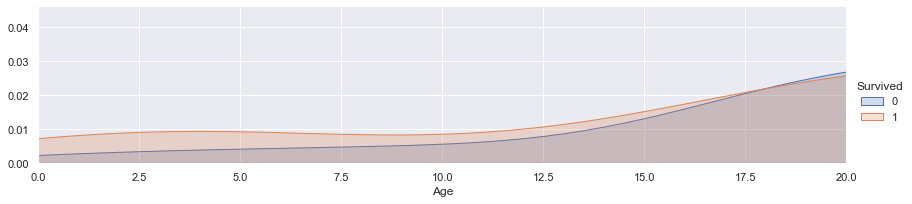

In [35]:
facet= sns.FacetGrid(train, hue= "Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train["Age"].max()))
facet.add_legend()

plt.xlim(0,20)

(20.0, 30.0)

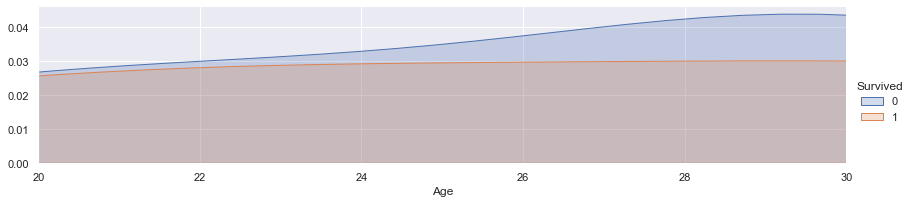

In [36]:
facet= sns.FacetGrid(train, hue= "Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train["Age"].max()))
facet.add_legend()

plt.xlim(20,30)

(30.0, 40.0)

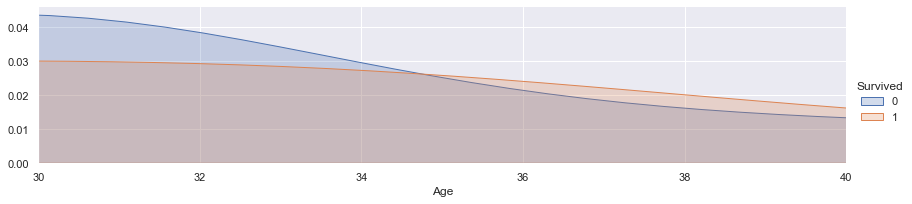

In [37]:
facet= sns.FacetGrid(train, hue= "Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train["Age"].max()))
facet.add_legend()

plt.xlim(30,40)

(40.0, 60.0)

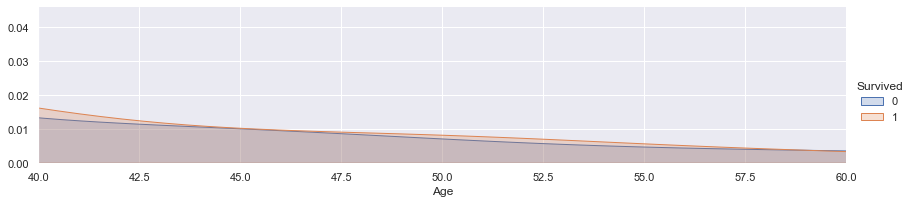

In [38]:
facet= sns.FacetGrid(train, hue= "Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train["Age"].max()))
facet.add_legend()

plt.xlim(40,60)

(60.0, 80.0)

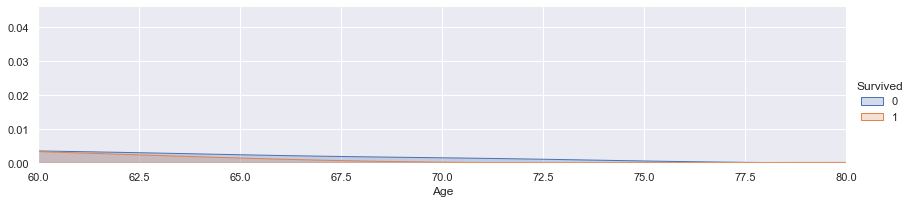

In [39]:
facet= sns.FacetGrid(train, hue= "Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train["Age"].max()))
facet.add_legend()

plt.xlim(60,80)

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


**Bining**<br>
child : 0<br>
young :1<br>
adult: 2 <br>
mid-age: 3 <br>
senior: 4


In [42]:
for dataset in train_test_data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4
    

In [43]:
train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2,0,0,373450,8.0500,NaN,S,0


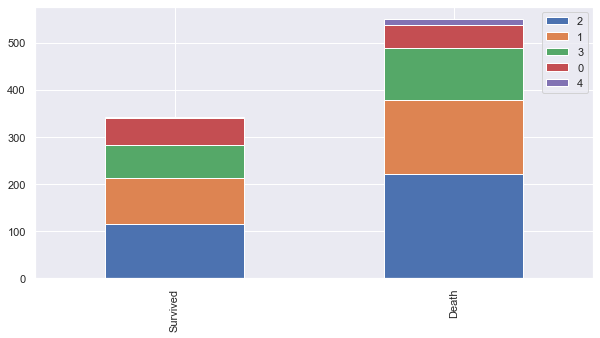

In [44]:
bar_chart('Age')

<AxesSubplot:>

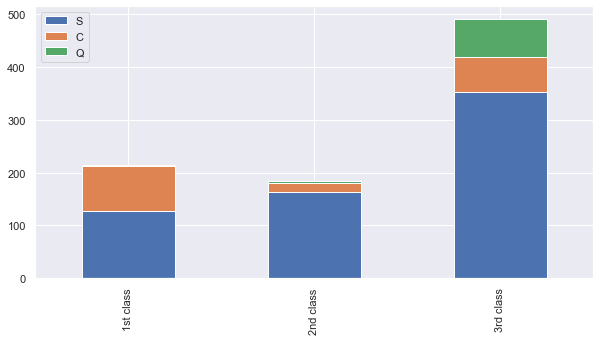

In [45]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index= ['1st class','2nd class','3rd class']
df.plot(kind='bar', stacked= True, figsize= (10,5))

In [46]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [47]:
train.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,2,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,3,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,2,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,0,1,0,237736,30.0708,NaN,C,2


In [48]:
embarked_mapping = {"S":0, "C": 1,"Q":2}
for dataset in train_test_data:
    dataset["Embarked"]= dataset['Embarked'].map(embarked_mapping)

In [49]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2,0,0,373450,8.0500,NaN,0,0


# Fare

In [50]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

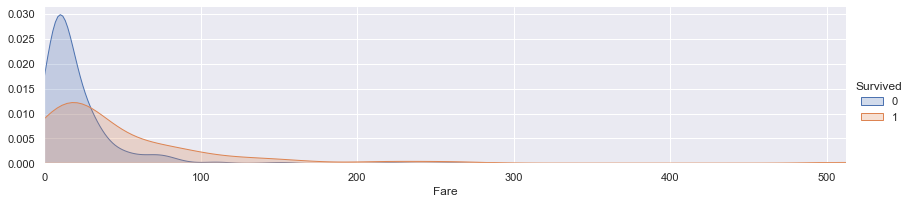

In [51]:
facet= sns.FacetGrid(train, hue='Survived',aspect = 4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

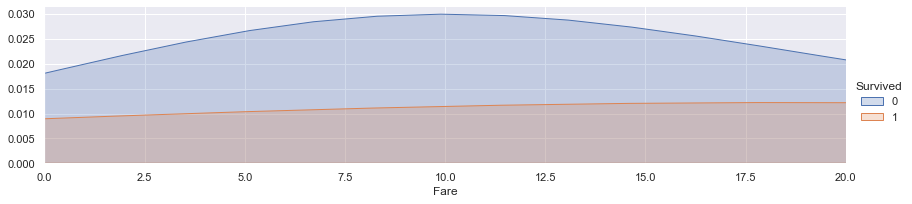

In [52]:
facet= sns.FacetGrid(train, hue='Survived',aspect = 4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,20)

(0.0, 30.0)

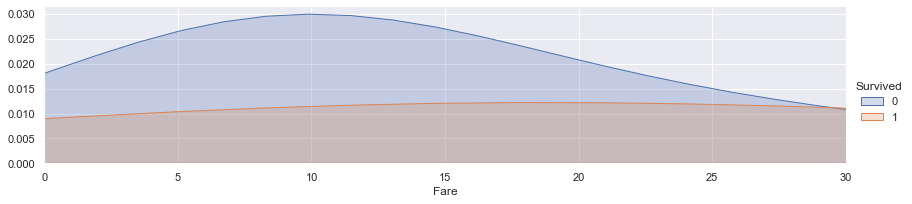

In [53]:
facet= sns.FacetGrid(train, hue='Survived',aspect = 4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,30)

(0.0, 512.3292)

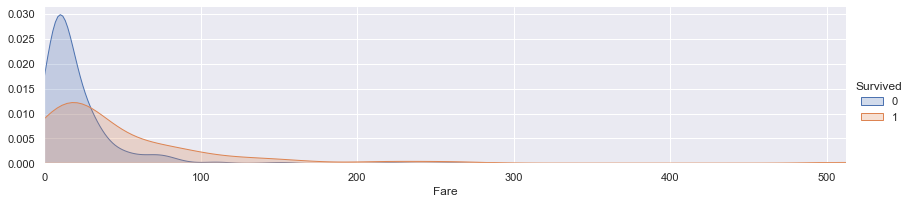

In [54]:
facet= sns.FacetGrid(train, hue='Survived',aspect = 4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0)

In [55]:
for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset.loc[ dataset['Fare'] <= 17, 'Fare']= 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare']= 1 
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare']= 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3
     

In [56]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1,1,0,A/5 21171,0,NaN,0,0
1,2,1,1,1,3,1,0,PC 17599,2,C85,1,2
2,3,1,3,1,1,0,0,STON/O2. 3101282,0,NaN,0,1
3,4,1,1,1,2,1,0,113803,2,C123,0,2
4,5,0,3,0,2,0,0,373450,0,NaN,0,0


In [57]:
train.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
D              3
C22 C26        3
              ..
D37            1
D11            1
E31            1
B82 B84        1
D45            1
Name: Cabin, Length: 147, dtype: int64

In [58]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<AxesSubplot:>

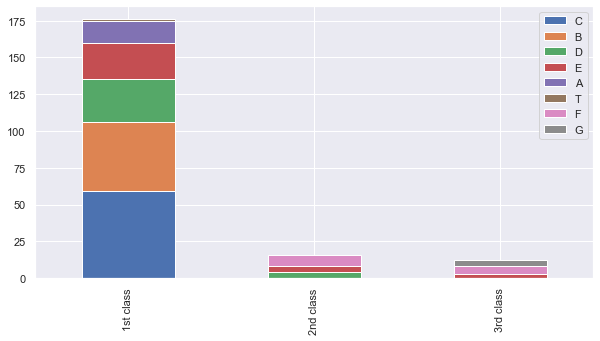

In [59]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df= pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index=['1st class','2nd class', '3rd class']
df.plot(kind= 'bar',stacked= True, figsize=(10,5))

In [60]:
cabin_mapping= {"A":0, "B":0.4, "C": 0.8,"D":1.2, "E": 1.6, "F":2, "G":2.4, "T":2.8}
for dataset in train_test_data:
    dataset["Cabin"]= dataset["Cabin"].map(cabin_mapping)

In [61]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)


In [62]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1


(0.0, 11.0)

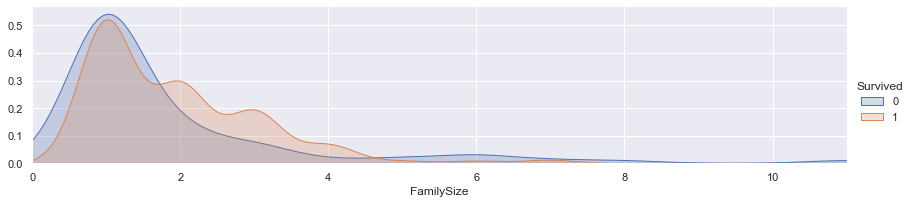

In [63]:
facet= sns.FacetGrid(train, hue='Survived',aspect = 4)
facet.map(sns.kdeplot,'FamilySize',shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [64]:
family_mapping = {1:0 , 2:0.4,3:0.8, 4:1.2,5:1.6,6:2,7:2.4,8:2.8,9:3.2,10:3.6,11:4 }
for dataset in train_test_data:
    dataset["FamilySize"] = dataset["FamilySize"].map(family_mapping)

In [65]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1,1,0,A/5 21171,0,2.0,0,0,0.4
1,2,1,1,1,3,1,0,PC 17599,2,0.8,1,2,0.4
2,3,1,3,1,1,0,0,STON/O2. 3101282,0,2.0,0,1,0.0
3,4,1,1,1,2,1,0,113803,2,0.8,0,2,0.4
4,5,0,3,0,2,0,0,373450,0,2.0,0,0,0.0


In [66]:
features_drop = ['Ticket','SibSp','Parch']
train = train.drop(features_drop, axis =1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'],axis=1)


In [67]:
train_data = train.drop('Survived', axis= 1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [68]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1,0,2.0,0,0,0.4
1,1,1,3,2,0.8,1,2,0.4
2,3,1,1,0,2.0,0,1,0.0
3,1,1,2,2,0.8,0,2,0.4
4,3,0,2,0,2.0,0,0,0.0


In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 


In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    int32  
 4   Fare        891 non-null    int32  
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(2), int32(2), int64(5)
memory usage: 55.8 KB


In [71]:
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score

# k_fold = KFold(n_splits =10, shuffle = True, random_state = 0)
print(test)

     PassengerId  Pclass  Sex  Age  Fare  Cabin  Embarked  Title  FamilySize
0            892       3    0    2     0    2.0         2      0         0.0
1            893       3    1    3     0    2.0         0      2         0.4
2            894       2    0    3     0    2.0         2      0         0.0
3            895       3    0    2     0    2.0         0      0         0.0
4            896       3    1    1     0    2.0         0      2         0.8
..           ...     ...  ...  ...   ...    ...       ...    ...         ...
413         1305       3    0    2     0    2.0         0      0         0.0
414         1306       1    1    3     3    0.8         1      3         0.0
415         1307       3    0    3     0    2.0         0      0         0.0
416         1308       3    0    2     0    2.0         0      0         0.0
417         1309       3    0    0     1    2.0         1      3         0.8

[418 rows x 9 columns]


In [78]:
clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(train_data, target)
test_data = test.iloc(["PassengerId","Pclass","Sex"],axis = 1).copy()
prediction = clf.predict(test_data)

TypeError: __call__() got multiple values for argument 'axis'

In [ ]:
submission = pd.DataFrame({
    
        "PassengerId": test["PassengerId"],
        "Survived": prediction

})
submission.to_csv('submissionzz.csv',index = False)

In [ ]:
submission= pd.read_csv('submissionzz.csv')
submission.head()
